# Implementasi Forecasting Temperature dengan metode Linear Regression

# 1. Business Understanding
#### Tujuan: Meramalkan suhu (temperature) berdasarkan variabel lain seperti CO2 dan kelembapan (humidity).

# 2. Data Understanding
#### File yang digunakan:
#### datatraining-temp.csv sebagai data latih.
#### datatest-temp.csv sebagai data uji.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Load the training and testing data
training_data = pd.read_csv('datatraining-temp.csv')
testing_data = pd.read_csv('datatest-temp.csv')

In [3]:
# Data Understanding
# Display first few rows of the training data
training_data.head()

,no,date,Temperature,Humidity,CO2
0,1,2000-01-31 0:00,23.18,27.2720,721.25
1,2,2000-02-01 0:00,23.15,27.2675,714.00
2,3,2000-02-02 0:00,23.15,27.2450,713.50
3,4,2000-02-03 0:00,23.15,27.2000,708.25
4,5,2000-02-04 0:00,23.10,27.2000,704.50


In [4]:
testing_data.head()

,date,Temperature,Humidity,CO2
0,2021-02-02 0:00,23.7000,26.272,749.200000
1,2021-02-03 0:00,23.7180,26.290,760.400000
2,2021-02-04 0:00,23.7300,26.230,769.666667
3,2021-02-05 0:00,23.7225,26.125,774.750000
4,2021-02-06 0:00,23.7540,26.200,779.000000


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7673 entries, 0 to 7672
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   no           7673 non-null   int64  
 1   date         7673 non-null   object 
 2   Temperature  7673 non-null   float64
 3   Humidity     7673 non-null   float64
 4   CO2          7673 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 299.9+ KB


In [6]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         301 non-null    object 
 1   Temperature  301 non-null    float64
 2   Humidity     301 non-null    float64
 3   CO2          301 non-null    float64
dtypes: float64(3), object(1)
memory usage: 9.5+ KB


# 3. Data Preparation
#### Mengatur atribut: Temperature sebagai label, dan CO2 serta Humidity sebagai fitur.

In [7]:
# Memilih fitur 'CO2' dan 'Humidity' dari data training sebagai input
X_train = training_data[['CO2', 'Humidity']]  # Features

# Memilih kolom 'Temperature' dari data training sebagai target prediksi
y_train = training_data['Temperature']  # Label

# Memilih fitur 'CO2' dan 'Humidity' dari data testing sebagai input
X_test = testing_data[['CO2', 'Humidity']]  # Features

# Memilih kolom 'Temperature' dari data testing untuk evaluasi model
y_test = testing_data['Temperature']  # True values for evaluation

# 4. Modelling
#### Membuat model regresi linear untuk memprediksi suhu.

In [8]:
# Modeling: Linear Regression
# Membuat instance baru dari model regresi linear
model = LinearRegression()

# Melatih model menggunakan data training
# X_train: data fitur (independen)
# y_train: data target (dependen)
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Membuat prediksi pada data tes
# Menggunakan model yang telah dilatih sebelumnya untuk memprediksi nilai target (y) 
# berdasarkan data fitur (X) pada dataset tes
y_pred = model.predict(X_test)

# 5. Evaluation
#### Mengevaluasi model menggunakan metrik seperti Mean Absolute Error (MAE) atau Root Mean Squared Error (RMSE).


In [10]:
# Evaluasi model
# Menghitung metrik evaluasi untuk memastikan kinerja model

# Mean Absolute Error (MAE)
# Menghitung rata-rata perbedaan absolut antara nilai sebenarnya (y_test) dan nilai prediksi (y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
# Menghitung akar kuadrat dari rata-rata perbedaan kuadrat antara nilai sebenarnya (y_test) dan nilai prediksi (y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [11]:
# Menampilkan metrik evaluasi
# Membuat dictionary untuk menyimpan hasil evaluasi
evaluation_results = {
    "Mean Absolute Error (MAE)": round(mae, 2),  # Menyimpan nilai MAE
    "Root Mean Squared Error (RMSE)": round(rmse,2)  # Menyimpan nilai RMSE
}

# Mengembalikan hasil evaluasi
evaluation_results  # Dictionary yang berisi nilai MAE dan RMSE

{'Mean Absolute Error (MAE)': np.float64(1.43),
 'Root Mean Squared Error (RMSE)': np.float64(1.52)}

# 6. Deployment
#### Menampilkan hasil prediksi dan visualisasi.

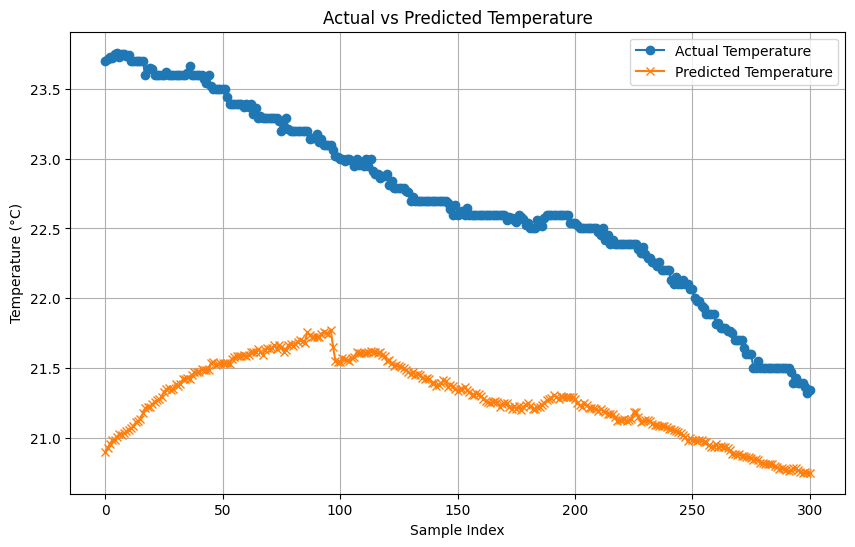

In [12]:
# Visualisasi Prediksi vs Nilai Sebenarnya
# Membuat plot untuk membandingkan nilai sebenarnya (y_test) dengan nilai prediksi (y_pred)

# Membuat figure dengan ukuran 10x6 inci
plt.figure(figsize=(10, 6))

# Plot nilai sebenarnya (y_test) dengan label "Actual Temperature" dan marker 'o'
plt.plot(y_test.values, label="Actual Temperature", marker='o')

# Plot nilai prediksi (y_pred) dengan label "Predicted Temperature" dan marker 'x'
plt.plot(y_pred, label="Predicted Temperature", marker='x')

# Menambahkan judul plot
plt.title("Actual vs Predicted Temperature")

# Menambahkan label pada sumbu x
plt.xlabel("Sample Index")

# Menambahkan label pada sumbu y
plt.ylabel("Temperature (°C)")

# Menambahkan legenda
plt.legend()

# Menambahkan grid pada plot
plt.grid(True)

# Menampilkan plot
plt.show()